Plot the horizontal correlation length read from the netCDF file written by [combined_correlation_len.jl](../julia/european-climatologies/combined_correlation_len.jl).

In [15]:
import os
import glob
import netCDF4
import logging
import calendar
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.ticker as mticker
coast_i = cf.GSHHSFeature(scale='i')
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [4]:
logger = logging.getLogger("EMODnet-Chemistry-Correlation-Length")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [7]:
CLfile = "/data/correlation_len_varlen1_0.25.nc"
figdir = "../figures/EMODnet2022/"
if not os.path.exists(figdir):
    os.makedirs(figdir)
os.path.isfile(CLfile)

True

## Make plot
Define projection

In [8]:
domain = [-45., 70., 24., 83.]
globalproj = ccrs.Orthographic(central_longitude=5.0, central_latitude=50.0, globe=None)

localproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]),
    min_latitude=domain[2],
    max_latitude=domain[3],
    globe=None)

localproj2 = ccrs.LambertAzimuthalEqualArea(central_longitude=0.5 * (domain[0] + domain[1]),
                                            central_latitude=0.5 * (domain[2] + domain[3]), 
                                      false_easting=0.0, 
                                      false_northing=0.0, globe=None)
localproj2

## Read data

In [9]:
lonr = np.arange(-45., 70.001, 0.25)
latr = np.arange(24., 83.001, 0.25)
llon, llat = np.meshgrid(lonr, latr)

In [10]:
with netCDF4.Dataset(CLfile, 'r') as nc:
    CL = nc.variables["correlation_length"][:]

In [24]:
for iproj, proj in enumerate([localproj, localproj2]):

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=proj)


    ax.set_title("Correlation length")
    pcm = ax.pcolormesh(llon, llat, CL, transform=ccrs.PlateCarree())
    ax.add_feature(coast_i, facecolor=".7", linewidth=0.0001, zorder=4)

    cb = plt.colorbar(pcm, orientation="vertical", shrink=.65)

    cb.set_label("(°)", rotation=0, ha="left")
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=2)

    #gl.top_labels = False
    #gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(-40., domain[1], 10.))
    gl.ylocator = mticker.FixedLocator(np.arange(20., 80.0001, 10.))
    # ax.set_extent(domain)

    plt.savefig(os.path.join(figdir, f"CLfield_{iproj}"))
    #plt.show()
    plt.close()
    fig.clf()

## Vertical correlation length
### Levels

In [28]:
depthr = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 
         60, 65, 70, 75, 80, 85, 90, 95, 100, 125, 150, 175, 
         200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 
         475, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 
         1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 
         1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100, 
         2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 
         3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 
         4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500]

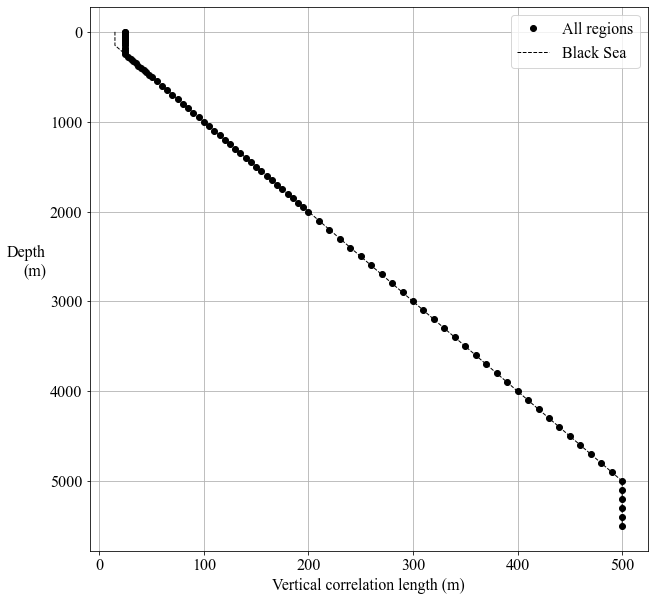

In [30]:
lenz1 = [np.min((np.max((25, ddd/10.)), 500.)) for ddd in depthr]
lenz2 = [np.min((np.max((15, ddd/10.)), 500.)) for ddd in depthr]

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(lenz1, depthr, "ko", lw=1, label="All regions")
ax.plot(lenz2, depthr, "k--", lw=1, label="Black Sea")
plt.gca().invert_yaxis()
ax.set_ylabel("Depth\n(m)", rotation=0, ha="right", fontsize=16)
ax.set_xlabel("Vertical correlation length (m)", fontsize=16)
plt.grid()
plt.legend()
plt.savefig(os.path.join(figdir, "vertical_correlation.jpg"))
plt.show()
plt.close()